In [2]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#data = pd.read_csv("C:/Users/ESTEBAN/Documents/Scripts_U/git/funtions/Data/FCD/datap1.csv", sep = ",")
#data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/funtions/Data/FCD/datap1.csv",sep=",") 
data_inicio = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/funtions/Data/FCD/datap1.csv",sep=",")

data_inicio.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [7]:
data_inicio.describe()

,ID,Age,Height,Weight,Year,IMC
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000,206853.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480,22.784520
std,39022.286345,6.393561,10.518462,14.348020,29.877632,2.912067
min,1.000000,10.000000,127.000000,25.000000,1896.000000,8.360954
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000,20.957171
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000,22.530864
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000,24.212293
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,63.901580


In [6]:
##Limpieza 

#Identificamos cuartiles y mediana
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df
    
data = data_inicio
data['Medal'] = data['Medal'].replace(np.nan,'No Medal')
data['IMC'] = (data['Weight']/((data['Height']/100)*(data['Height']/100)))
data = data.dropna()
data = data.drop(data[data['IMC']<18.5].index)
data
# data.to_csv("Data_limpio.csv")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,20.761246
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,23.959094
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,23.959094
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,23.959094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,27.776911
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,19.047004
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,19.047004
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,28.049671


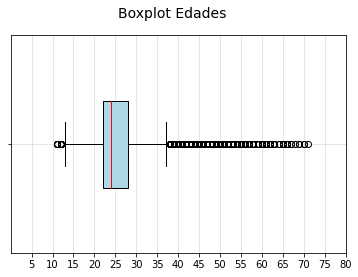

In [53]:
plt.boxplot(data["Age"], vert = False, widths = 0.4, patch_artist=True, 
            boxprops = dict(facecolor="lightblue", color="black"),medianprops = dict(color="red"))
plt.xlim(0,80); 
plt.yticks([1],[''])
plt.suptitle('Boxplot Edades', fontsize=14)
plt.xticks([i for i in range(5,81,5)])
plt.grid(alpha = 0.4)
plt.show()

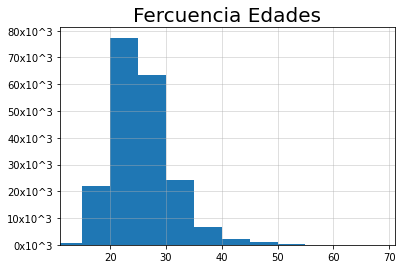

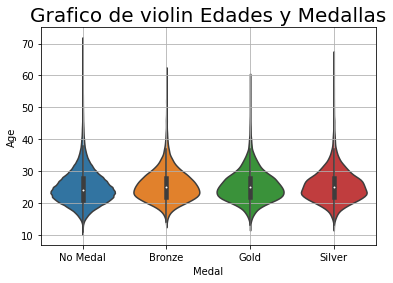

In [60]:
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))+"x10^3"
    elif (n!=0):
        return str((int(n / 1e3)))+"x10^3"

edad = data["Age"]
plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

f = plt.figure(1)
plt.hist(edad, bins)
plt.title("Fercuencia Edades", fontsize = 20)
plt.grid(alpha=0.5)

g = plt.figure(2)
plt.title("Grafico de violin Edades y Medallas", fontsize = 20)
sns.violinplot(x="Medal", y="Age", data=data)

plt.grid(alpha=1)
plt.show()

In [63]:
bins = [i for i in range(0,101,10)]   

edad = pd.cut(data_inicio["Age"], bins)

edad.value_counts(sort = False)

(0, 10]           1
(10, 20]      47560
(20, 30]     171974
(30, 40]      34406
(40, 50]       5763
(50, 60]       1368
(60, 70]        469
(70, 80]         93
(80, 90]          6
(90, 100]         2
Name: Age, dtype: int64

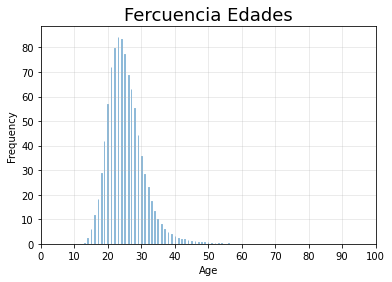

In [64]:

def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))
edad = data["Age"]
plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

sns.set_style("whitegrid")
sns_plot = sns.histplot(data = data, x = "Age", stat="frequency", fill = False)

plt.xticks(bins)
plt.title("Fercuencia Edades", fontsize = 18)
plt.grid(alpha = 0.3)
plt.show()

# sns_plot.get_figure().savefig("output.png")

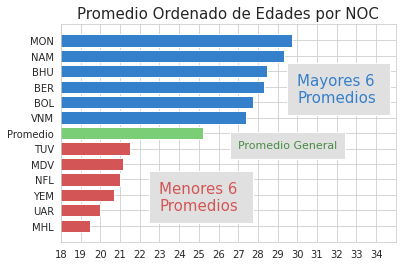

In [196]:
def prnt(df,data):
    for a in list(df.index):
        print("Deporte: ",a)
        print("Promedio: ",data[data["NOC"] == a]["Age"].mean() ,"\n")
    return 0

#Compar edad con deporte con promedio de todas las edades
df = pd.DataFrame(data["NOC"].value_counts())
nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["NOC"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres)
dframe.columns = ["Promedio Edades"]
dframe.sort_values(by = "Promedio Edades", inplace=True, ascending=True)

dfmean = pd.DataFrame([data["Age"].mean()],columns=["Promedio Edades"],index=["Promedio"])
dframe = pd.concat([dframe.head(6),dfmean,dframe.tail(6)])
c1 = '#d45555'
c2 = '#3580ca'
c3 = '#7acf76'
color = []
for i in range(6): color.append(c1)
color.append(c3)
for i in range(6): color.append(c2)
plt.barh(list(dframe.index),dframe["Promedio Edades"],color = color)
plt.xticks([x for x in range(10,35)])

plt.xlim([18,35])
plt.title("Promedio Ordenado de Edades por NOC", fontsize = 15)
plt.text(30,8, 'Mayores 6 \nPromedios', fontsize=15, color=c2, bbox ={'facecolor':'#e0e0e0', 'pad':10})
plt.text(23,1, 'Menores 6 \nPromedios', fontsize=15, color=c1, bbox ={'facecolor':'#e0e0e0', 'pad':10})
plt.text(27,5, 'Promedio General', fontsize=11, color="#488c45", bbox ={'facecolor':'#e0e0e0', 'pad':8})
plt.show()
# prnt(dframe,data)


In [182]:
f = pd.DataFrame([data["Age"].mean()],index=["Promedio"], columns=["Promedio Edades"])
f

,Promedio Edades
Promedio,25.195512


In [213]:
# data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/Data_limpio.csv",sep=",")
data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/datap1.csv",sep=",")
eval = "Name"

#Compar edad con deporte con promedio de todas las edades
df = pd.DataFrame(data[eval].value_counts())

nombres = ["Andreas Wecker", "Jean Lucien Nicolas Jacoby", "Takashi Ono", "Joseph \"Josy\" Stoffel", "Heikki Ilmari Savolainen", "Robert Tait McKenzie"]
Ages = []

for a in nombres:
    # print(eval,": ",a)
    # print("Promedio: ",data[data[eval] == a]["Age"].mean() ,"\n")
    Ages.append(data[data[eval] == a]["Age"].mean())                                                    

dframe = pd.DataFrame(Ages,nombres)
dframe.columns = ["Promedio Edades"]
dframe.sort_values(by = "Promedio Edades", inplace=True, ascending=False)
dframe

,Promedio Edades
Robert Tait McKenzie,64.655172
Jean Lucien Nicolas Jacoby,42.125000
Heikki Ilmari Savolainen,31.487179
"Joseph ""Josy"" Stoffel",27.789474
Takashi Ono,26.787879
Andreas Wecker,24.000000


In [74]:
df = pd.DataFrame(data["NOC"].value_counts())

nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["Sport"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres).dropna()
dframe

,0
USA,25.218859
CAN,24.983024
FRA,25.519436
GBR,25.503175
ITA,25.621778
...,...
SSD,24.000000
SAA,21.666667
YMD,24.000000
UAR,20.000000


In [5]:
df5height = data

plt.hist(df5height['Age'],21, color="green", ec= "black")
ax = plt.subplot()

plt.axvline(df5height["Age"].median(), color='yellow', linestyle='--', linewidth=1)
plt.axvline(df5height["Age"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df5height["Age"].mode().get(0), color='cyan', linestyle='--', linewidth=1)

plt.title('Edad de deportistas')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de deportistas (n*10^3)')

#Añadimos el texto en la linea de la mediana
min_ylim, max_ylim = plt.ylim()
a = plt.text(df5height["Age"].median()*0.87, max_ylim*0.9, 'Mediana'.format(df5height["Age"].median()),color='black')
b = plt.text(df5height["Age"].mean()*1.01, max_ylim*0.8, 'Promedio'.format(df5height["Age"].mean()),color='black')
c = plt.text(df5height["Age"].mode().get(0)*0.91, max_ylim*0.7, 'Moda'.format(df5height["Age"].mean()),color='black')

a.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor='black'))
b.set_bbox(dict(facecolor='red', alpha=0.5, edgecolor='black'))
c.set_bbox(dict(facecolor='cyan', alpha=0.5, edgecolor='black'))

#Cambiamos formato de eje y
plt.gca().yaxis.set_major_formatter(lblFormat)
plt.savefig('grafico_sin_outliers.jpg')
plt.show()
plt.close('df5')

NameError: name 'data' is not defined